In [ ]:
#1.Data Preprocessing
#2.Tokenization
#3.Stemming
#4.Vectorization using tfdif vectors
#5.train split test
#6.imprt passive aggressive classifier
 # create obj and fit dataset
#7.make confusion matrix and get score

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





news = pd.read_csv('/home/prathamesh/Documents/Datasets/news.csv')
news.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
news.index

RangeIndex(start=0, stop=6335, step=1)

In [5]:
news.shape

(6335, 4)

In [6]:
news.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [7]:
news.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [8]:
news.dropna(inplace = True)

In [9]:
news.shape

(6335, 4)

In [10]:
X = news.drop('label', axis=1)
X.head()

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...


In [11]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
import re

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

data = []
for i in range(6335):
    r = re.sub('[^a-zA-Z]', ' ', news['text'][i])   
    r = r.lower()
    r = r.split()  #this will convert it into a list
    r = [ps.stem(word) for word in r if not word in set(stopwords.words('english'))]
    r = ' '.join(r)
    data.append(r)




In [46]:
data[0]

'daniel greenfield shillman journal fellow freedom center new york writer focus radic islam final stretch elect hillari rodham clinton gone war fbi word unpreced thrown around often elect ought retir still unpreced nomine major polit parti go war fbi exactli hillari peopl done coma patient wake watch hour cnn hospit bed would assum fbi director jame comey hillari oppon elect fbi attack everyon obama cnn hillari peopl circul letter attack comey current media hit piec lambast target trump surpris clinton alli start run attack ad fbi fbi leadership warn entir left wing establish form lynch mob continu go hillari fbi credibl attack media democrat preemptiv head result investig clinton foundat hillari clinton covert struggl fbi agent obama doj peopl gone explos public new york time compar comey j edgar hoover bizarr headlin jame comey role recal hoover fbi fairli practic admit front spout nonsens boston globe publish column call comey resign outdon time editori claim scandal realli attack w

In [12]:
Y = news['label']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Y = lb.fit_transform(Y)
#labelled the FAKE as 0 and REAL as 1


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_v=TfidfVectorizer(max_features=6000,ngram_range=(1,3))
X=tfidf_v.fit_transform(data).toarray()

In [70]:
X.shape

(6335, 6000)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [96]:
count = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [97]:
count.head()

,abandon,abc,abc news,abdullah,abedin,abid,abil,abl,abolish,abort,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.044459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.064349,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
def plot_confusion_matrix(cm, classes,normalize = False,title='CONFUSION MATRIX',cmap=plt.cm.Reds):
                        
                          
                       
    plt.imshow(cm, interpolation=None, cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
   #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  #      print("Normalized confusion matrix")
  #  else:
   #     print('Confusion matrix, without normalization')

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [99]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.920


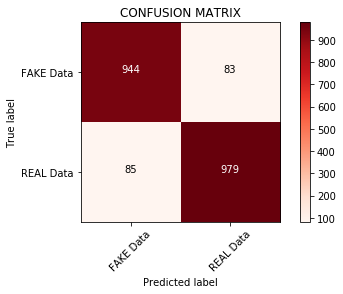

In [103]:
from sklearn import metrics
import numpy as np
import itertools
linear_clf.fit(X_train, Y_train)

pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(Y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(Y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [101]:
cm

array([[945,  82],
       [ 89, 975]])

In [29]:
linear_clf

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [30]:
pred

array([1, 0, 0, ..., 1, 1, 0])

In [66]:
cm.max()/2

489.0

In [67]:
range(cm.shape[0])

range(0, 2)

In [68]:
range(cm.shape[1])

range(0, 2)